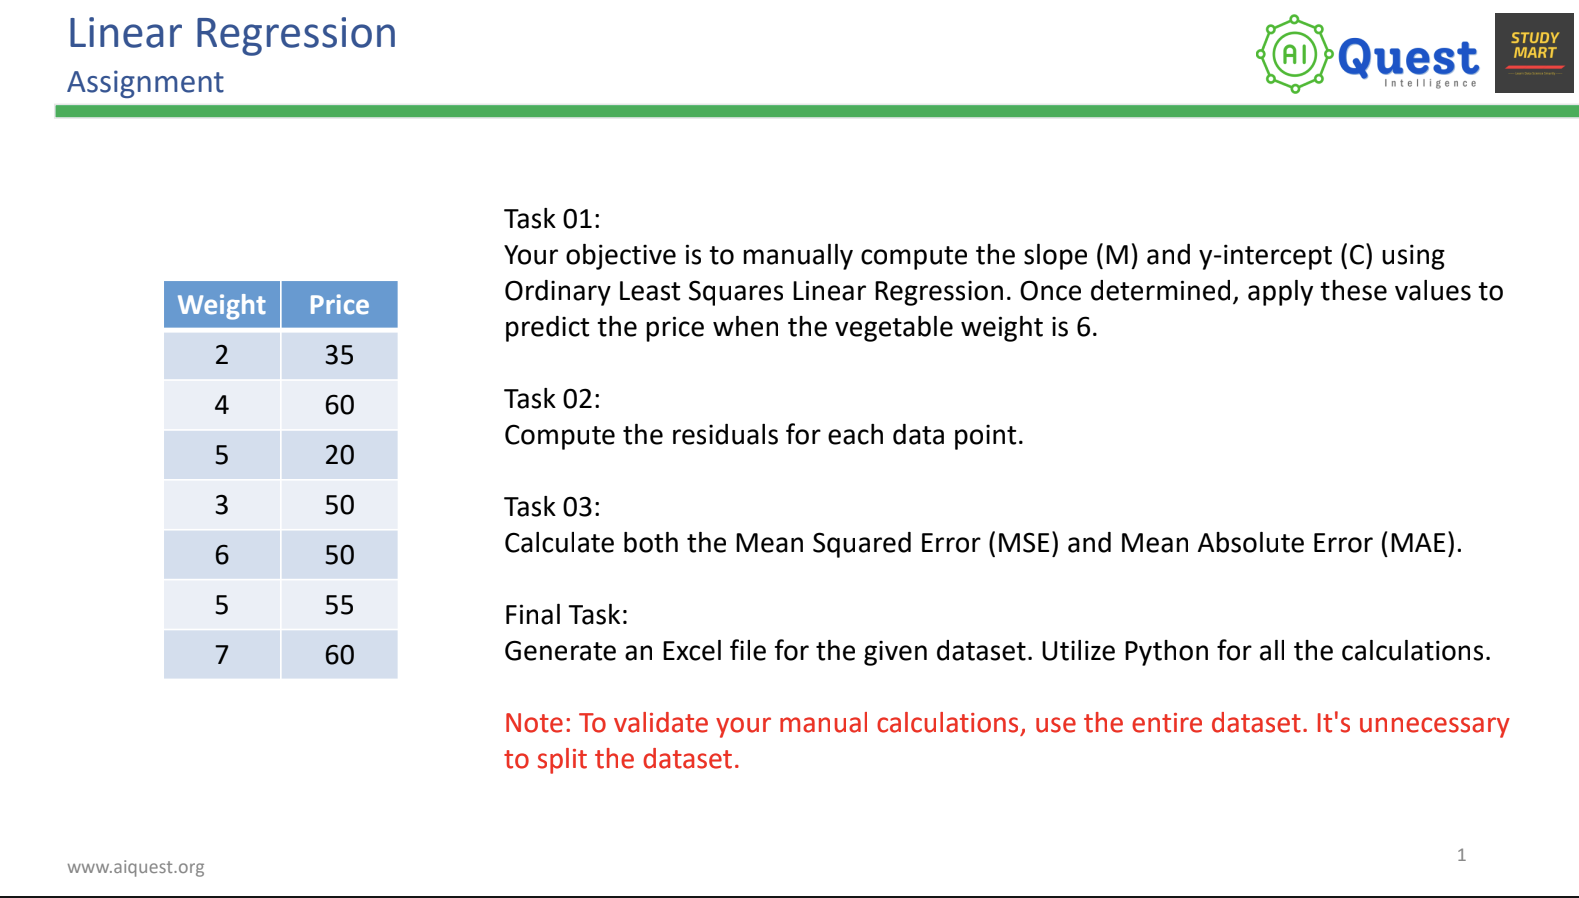

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Task 1

In [18]:
x1 = np.array([2, 4, 5, 3,6,5,7])
y1 = np.array([35,60,20,50,50,55,60])

In [19]:
df = pd.DataFrame({'Weight': x1, 'Price': y1})
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [29]:
x = df['Weight']
y = df['Price']

mean_x = np.mean(x)
mean_x



4.571428571428571

In [30]:
mean_y = np.mean(y)
mean_y


47.142857142857146

In [32]:
dev_x = x - mean_x
dev_y = y - mean_y

In [33]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)
print(m)

2.620967741935484


In [34]:
c = mean_y - (m*mean_x)
print(c)

35.16129032258065


In [39]:
# y = mx + c
pred_6 = (m*6) + c
pred_6

50.88709677419355

### Task 2

In [40]:
pred = (m*x)+c
pred

0    40.403226
1    45.645161
2    48.266129
3    43.024194
4    50.887097
5    48.266129
6    53.508065
Name: Weight, dtype: float64

In [41]:
resd = y - pred
resd

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

### Task 3

In [42]:
n = len(x)
n

7

In [76]:
mae= (resd.abs().sum())/n
mae

9.87327188940092

In [77]:
mse = ((resd**2).sum())/n
mse

167.30990783410135

### Final Task

In [49]:
df1 = pd.read_csv("/kaggle/input/vegetable-price/vegetable_price.csv")
df1

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [50]:
reg = LinearRegression()
reg.fit(df[['Weight']] , df['Price']) 

LinearRegression()

In [52]:
reg.coef_

array([2.62096774])

In [53]:
reg.intercept_

35.16129032258065

In [61]:
df1['Predicted'] = reg.predict(df1[['Weight']])
df1

,Weight,Price,Predicted
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [63]:
df1['Residuals'] = df1['Price'] - df1['Predicted']
df1

,Weight,Price,Predicted,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [68]:
mse1 = mean_squared_error(df1[['Price']], df1[['Predicted']])
mse1

167.30990783410135

In [71]:
mae1 = mean_absolute_error(df1.Price , df1.Predicted)
mae1

9.87327188940092

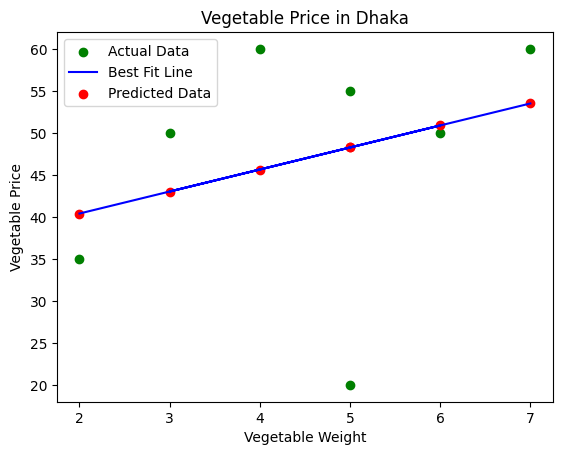

In [80]:
#equation of the line
#equation = f"y = {m:.2f}x + {c:.2f}"

# plot the data
plt.scatter(df1['Weight'], df1['Price'], color='green', label="Actual Data")  # Original data points
plt.plot(df1['Weight'], df1['Predicted'], color='blue', label="Best Fit Line")  # Regression line
plt.scatter(df1['Weight'], df1['Predicted'], color='red', label="Predicted Data")  # Predicted points

plt.xlabel('Vegetable Weight')
plt.ylabel('Vegetable Price')
plt.title('Vegetable Price in Dhaka')
#plt.text(min(df1['Weight']), max(df1['Price']) - reg.intercept_, equation, fontsize=10, color='blue')  # Display equation on plot

# Adding a legend
plt.legend()

# Showing the plot
plt.show()